# Regression with multiple variables

In [ ]:
# to run on Colab
pip install ipympl

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model

%matplotlib widget

Until now we have only seen examples where the dependent variable, the one we want to predict, depends only on one variable (features), e.g. the wine ```fixed acidity``` on the ```density```. However as mentioned before, we can use multiple variables so that $y = w_0 + w_1 * var_1 + w_2 * var_2 + \ldots$ All the algorithms of scikit-learn are designed to work for such cases also. For example let's see if we can predict wine ```fixed acidity``` using the ```density``` and ```pH``` features. For this we have to change our ```X``` variable which contains the independent variables. We will run the regression once with a single and once with two variables to be able to compare:

In [3]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [4]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
y = wine['fixed acidity']

X_1 = wine[['density']]

X_2 = wine[['density', 'pH']]
X_2.head(5)

,density,pH
0,0.9978,3.51
1,0.9968,3.20
2,0.9970,3.26
3,0.9980,3.16
4,0.9978,3.51


Now we can again perform the fit. We do it once with just the ```density``` and once with both parameters to compare results:

In [6]:
model_one = linear_model.LinearRegression()
model_two = linear_model.LinearRegression()

res_one = model_one.fit(X=X_1, y=y)
res_two = model_two.fit(X=X_2, y=y)

In [7]:
res_one.coef_

array([616.28450984])

In [8]:
res_two.coef_

array([454.00256506,  -5.80584718])

In [9]:
res_two.intercept_

-424.98209456611954

We see that now we have two values for ```coef_```, one for each independent variable. We also see that now the parameter $w_1$ for ```density``` is slightly different from before (616 vs. 662). This is normal: we are trying to optimize for the two variables at the same time! We can now check how the error changes, i.e. what is the sum of squared *residuals*:

In [10]:
print('model 1')
np.sum((res_one.predict(X_1) - y)**2)

model 1


2682.297497684005

In [11]:
print('model 1')
np.sum((res_two.predict(X_2) - y)**2)

model 1


1548.3161263073707

Clearly the fit with two variables captures more of the information! Our model is now a surface which can be written as $z=f(x,y)$ where z is the predicted ```fixed acidity``` and the features $x$ and $y$ are ```density``` and ```pH```. However we can still plot the data in two dimensions for each feature separately. We basically ignore one of the features (we project it):

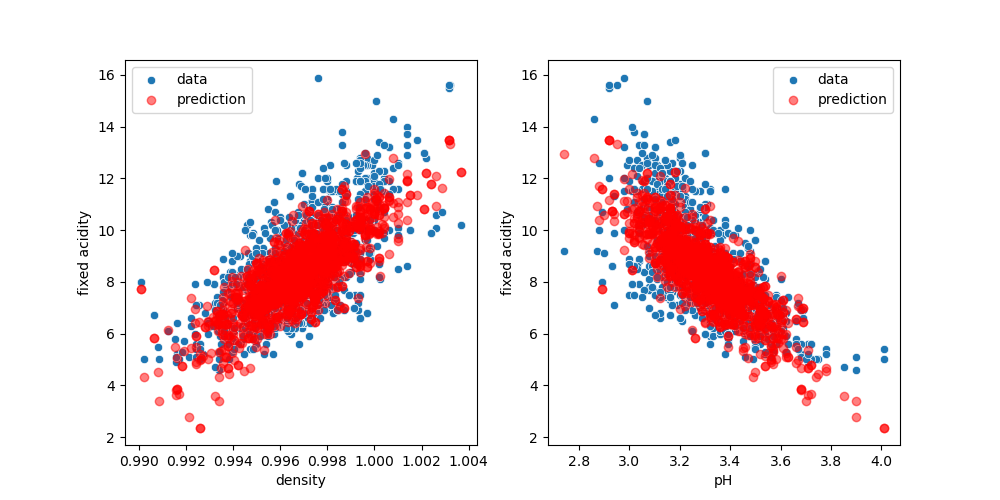

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=wine, x='density', y='fixed acidity', label='data', ax=ax[0]);
ax[0].plot(X_2.density, res_two.predict(X_2), 'ro', alpha=0.5, label='prediction');
sns.scatterplot(data=wine, x='pH', y='fixed acidity', label='data', ax=ax[1]);
ax[1].plot(X_2.pH, res_two.predict(X_2), 'ro', alpha=0.5, label='prediction');
ax[0].legend();
ax[1].legend();

We can however still represent our data as we can draw points in 3D, the third dimension being our predicted feature. Then we can look at the 3D plot perpendicularly to one axis and we recover the plots we have above. This is what is done below where we actually use a grid of values for the two features, to make it clear that we are dealing with a plane:

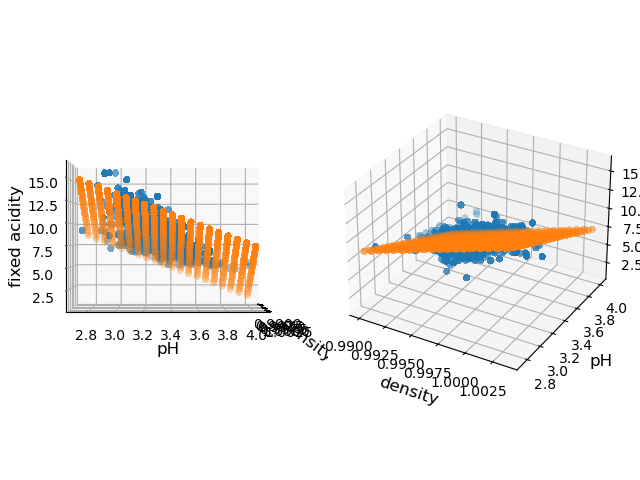

In [13]:
fig = plt.figure()

X_1_grid, X_2_grid = np.meshgrid(
    np.linspace(wine.density.min(), wine.density.max(),20),
    np.linspace(wine.pH.min(), wine.pH.max(),20)
)
y_pred = res_two.predict(pd.DataFrame({'density': X_1_grid.ravel(), 'pH': X_2_grid.ravel()}))

x_1 = X_2.density.values
x_2 = X_2.pH.values
x_3 = y.values

ax1 = fig.add_subplot(1, 2, 1, projection='3d',computed_zorder=False)
ax2 = fig.add_subplot(1, 2, 2, projection='3d',computed_zorder=False)
axes = [ax1, ax2]
for ax in axes:
    # Plot the surface.
    surf = ax.scatter(x_1, x_2, x_3, linewidth=0, antialiased=False)

    surf = ax.scatter(X_1_grid, X_2_grid, y_pred, linewidth=0, antialiased=False)

    ax.set_xlabel('density', fontdict={'fontsize':12})
    ax.set_ylabel('pH', fontdict={'fontsize':12});
    ax.set_zlabel('fixed acidity', fontdict={'fontsize':12});
ax1.view_init(elev=0., azim=0)
fig.tight_layout()

## Features of different "sizes"

One potential problem when using multiple variables, is that they might not all have the same magnitude. For example in the ```wine``` dataset we see that there's an order of magnitude difference between ```fixed acidity``` and ```volatile acidity```. The problem with this is that since we try to minimize the distance from our model to our datapoints *jointly* for all features, in certain cases those differences might give a larger weight to one or the other feature. For example if instead of ```LinearRegressor``` we use the ```Ridge``` regressor, the fit will fail with the original data:

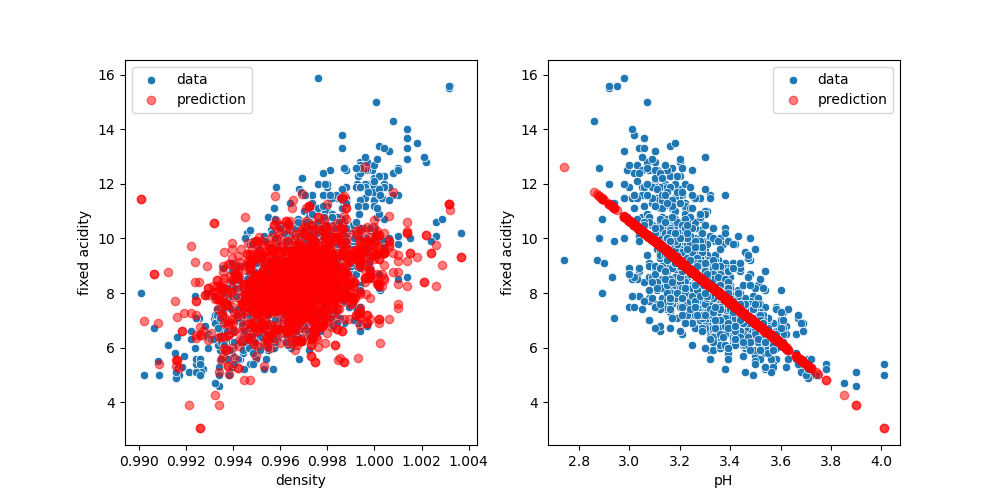

In [14]:
model = linear_model.Ridge()

res_ridge = model.fit(X=X_2, y=y)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=wine, x='density', y='fixed acidity', label='data', ax=ax[0]);
ax[0].plot(X_2.density, res_ridge.predict(X_2), 'ro', alpha=0.5, label='prediction');
sns.scatterplot(data=wine, x='pH', y='fixed acidity', label='data', ax=ax[1]);
ax[1].plot(X_2.pH, res_ridge.predict(X_2), 'ro', alpha=0.5, label='prediction');
ax[0].legend();
ax[1].legend();

Ridge regression tries to make sure that we don't over-interpret our data and have suddenly one feature that becomes exceedingly important. Therefore we have to first make sure that all features are "equivalent". For that we can *normalize* them, i.e. ensuring that they have a mean value of 0 and a standard deviation of 1. In the example below we have two variables, one centered around 4, the other around 10, and one has a width of about 10 and the other 2.

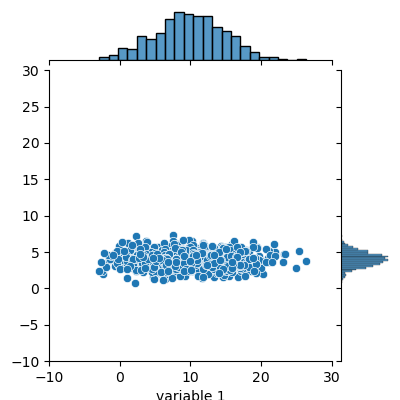

In [15]:
variables = pd.DataFrame({
    'variable 1': np.random.normal(loc=10, scale=5, size=1000),
    'variable 2': np.random.normal(loc=4, scale=1, size=1000)})
jpl = sns.jointplot(data=variables,
              x='variable 1', y='variable 2', xlim=(-10,30), ylim=(-10,30)
)
jpl.figure.set_size_inches(w=4, h=4)

The goal is to transform these points so that they have similar distributions. For that we have to shift them (subtraction) so that they are centered around 0 and divide them by a certain factor so that they have the same width:

In [16]:
variables['variable 1'] = (variables['variable 1'] - np.mean(variables['variable 1'])) / np.std(variables['variable 1'])
variables['variable 2'] = (variables['variable 2'] - np.mean(variables['variable 2'])) / np.std(variables['variable 2'])

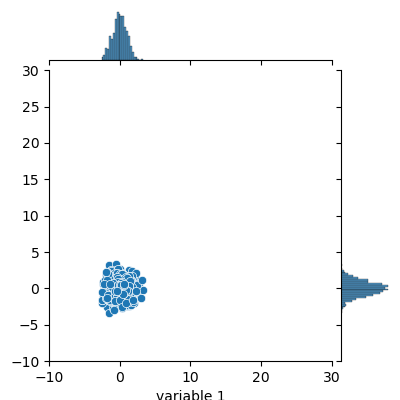

In [17]:
jpl = sns.jointplot(data=variables,
              x='variable 1', y='variable 2', xlim=(-10,30), ylim=(-10,30)
)
jpl.figure.set_size_inches(w=4, h=4)

Instead of doing this operation manually we can use a ```preprocessing``` function from sklearn:

In [18]:
from sklearn import preprocessing

Here we use the ```StandardScaler``` to normalize. It works the same way as the models:
1. Instantiate it
2. fit the data. In this case we need to fit (compute the mean and standard deviation) **and** transform the data. So we use the ```fit_transform``` function instead of just ```fit```

We can pass directly our whole DataFrame. As the output is just a Numpy array, we transform it back to a DataFrame:

In [19]:
sc = preprocessing.StandardScaler()
wine_scaled = pd.DataFrame(sc.fit_transform(wine), columns=wine.columns)

Let's make a histogram of before/after normalization of the ```pH```:

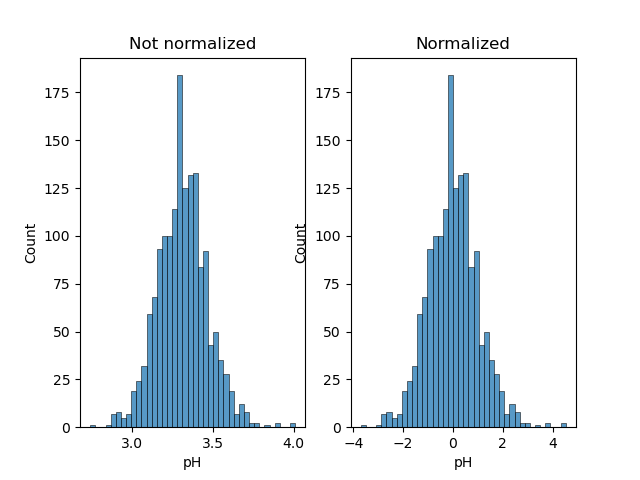

In [20]:
fig, ax = plt.subplots(1, 2)
sns.histplot(wine.pH, ax=ax[0])
sns.histplot(wine_scaled.pH, ax=ax[1])
ax[0].set_title('Not normalized')
ax[1].set_title('Normalized');

We see that it doesn't affect the shape of the distribution, just its scale. Now we can try again our fit:

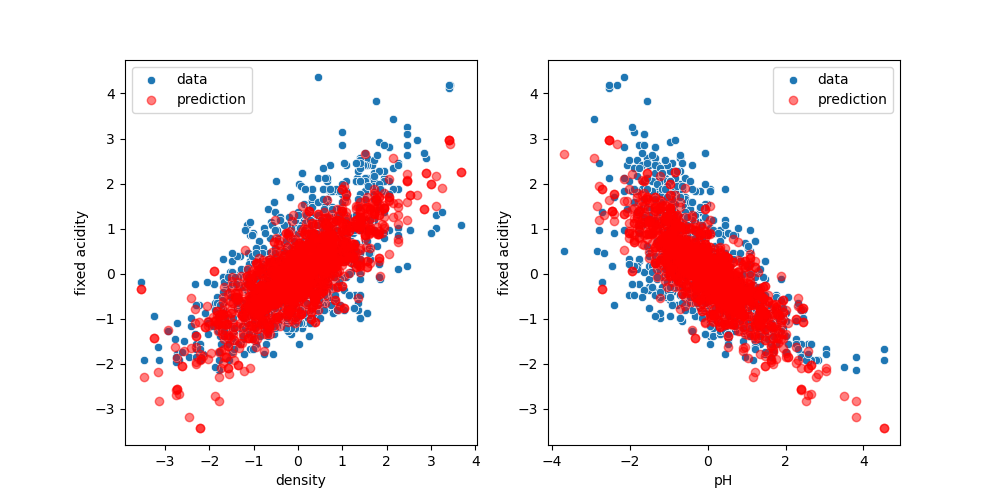

In [21]:
X_2_scaled = wine_scaled[['density', 'pH']]
y_scaled = wine_scaled['fixed acidity']

model = linear_model.Ridge()

res_ridge = model.fit(X=X_2_scaled, y=y_scaled)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=wine_scaled, x='density', y='fixed acidity', label='data', ax=ax[0]);
ax[0].plot(X_2_scaled.density, res_ridge.predict(X_2_scaled), 'ro', alpha=0.5, label='prediction');
sns.scatterplot(data=wine_scaled, x='pH', y='fixed acidity', label='data', ax=ax[1]);
ax[1].plot(X_2_scaled.pH, res_ridge.predict(X_2_scaled), 'ro', alpha=0.5, label='prediction');
ax[0].legend();
ax[1].legend();

## Exercise

1. Import the dataset at this address: https://raw.githubusercontent.com/guiwitz/EHML/main/datasets/kc_house_data.csv. This dataset contains information about houses sold in Kings County (California) such as price, surface etc.

2. Predict the ```price``` using first only the ```grade``` and then the ```grade```, ```bedrooms``` and ```bathrooms``` columns

3. Compute the mean square error for both models. Which one is better and did it improve a lot?

4. Repeat the above by sub-selecting only the ```zipcode = 98103```. What do you observe?

5. Make a pairplot with the ```bedrooms```, ```grade``` and ```price``` columns. Do you see anything special regarding the ```bedrooms``` data? If yes try to fix it and rerun the above analysis. What do you observe?